#### import libraries

In [6]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [11]:
product_details = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\Retail-Demand-and-Waste-Prediction\raw data\product_details.csv")
store_info = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\Retail-Demand-and-Waste-Prediction\raw data\store_info.csv")
supplier_info = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\Retail-Demand-and-Waste-Prediction\raw data\supplier_info.csv")
weather_data = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\Retail-Demand-and-Waste-Prediction\raw data\weather_data.csv")
weekly_sales = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\Retail-Demand-and-Waste-Prediction\raw data\weekly_sales.csv")

### product_detail data

In [12]:
product_details.head()

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,1000,Whole Wheat Bread 800g,Bakery,4,4
1,1001,White Sandwich Loaf,Bakery,2,8
2,1002,Croissant 4-pack,Bakery,2,5
3,1003,Blueberry Muffins 6-pack,Bakery,4,10
4,1004,Chocolate Chip Cookies,Bakery,4,7


### store info data

In [ ]:
store_info.head()

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330


### supplier info data

In [ ]:
supplier_info.head()

,Supplier_ID,Supplier_Name,Lead_Time_Days,Supply_Capacity
0,1,FreshFoods UK Ltd.,1,68047
1,2,Quality Provisions Co.,2,35230
2,3,FarmDirect Suppliers Ltd.,2,71976
3,4,PremiumGoods Wholesale,3,48776
4,5,LocalHarvest Distributors,2,11306


### weekly sales data

In [ ]:
weekly_sales.head()

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46


### weather data

In [ ]:
weather_data.head()

,Week_Number,Region,Avg_Temperature,Rainfall,Holiday_Flag
0,2024-W01,Midlands,7.4,32.1,0
1,2024-W01,South East,10.5,15.7,0
2,2024-W01,North West,6.8,28.5,1
3,2024-W01,London,9.9,23.0,1
4,2024-W01,South West,10.0,45.9,1


## EDA Stage 1

In [ ]:
def EDA_Stage_1(data, name):
  print('='*60)
  print(f'{name} dataset information')
  print(data.info())
  print('='*60)
  print(f'{name} dataset shape')
  print(data.shape)
  print('='*60)
  print(f'{name} dataset description')
  print(data.describe())
  print('='*60)
  print(f'{name} dataset columns')
  print(data.columns)
  print('='*60)
  print(f'{name} dataset missing values')
  print(data.isna().sum())
  print('='*60)
  print(f'{name} dataset duplicate values')
  print(data.duplicated().sum())
  print('='*60)


In [ ]:
EDA_Stage_1(product_details, 'product_details')

product_details dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        48 non-null     int64 
 1   Product_Name      48 non-null     object
 2   Product_Category  48 non-null     object
 3   Shelf_Life_Days   48 non-null     int64 
 4   Supplier_ID       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB
None
product_details dataset shape
(48, 5)
product_details dataset description
       Product_ID  Shelf_Life_Days  Supplier_ID
count       48.00        48.000000    48.000000
mean      1023.50        59.916667     5.958333
std         14.00        99.226333     2.782608
min       1000.00         2.000000     1.000000
25%       1011.75         4.000000     4.000000
50%       1023.50         7.500000     6.000000
75%       1035.25        36.250000     8.000000
max       1047.00       356

In [ ]:
EDA_Stage_1(store_info, 'store info')

store info dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Store_ID               15 non-null     int64 
 1   Region                 15 non-null     object
 2   Store_Size             15 non-null     int64 
 3   Cold_Storage_Capacity  15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes
None
store info dataset shape
(15, 4)
store info dataset description
         Store_ID    Store_Size  Cold_Storage_Capacity
count   15.000000     15.000000              15.000000
mean   507.000000   5333.333333            1527.066667
std      4.472136   2894.987458             965.651628
min    500.000000   3000.000000             634.000000
25%    503.500000   3500.000000             999.500000
50%    507.000000   4000.000000            1086.000000
75%    510.500000   5000.000000            1509.5000

In [ ]:
EDA_Stage_1(supplier_info, 'supplier info')

supplier info dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Supplier_ID      10 non-null     int64 
 1   Supplier_Name    10 non-null     object
 2   Lead_Time_Days   10 non-null     int64 
 3   Supply_Capacity  10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 452.0+ bytes
None
supplier info dataset shape
(10, 4)
supplier info dataset description
       Supplier_ID  Lead_Time_Days  Supply_Capacity
count     10.00000       10.000000        10.000000
mean       5.50000        2.200000     48161.200000
std        3.02765        0.632456     18121.601841
min        1.00000        1.000000     11306.000000
25%        3.25000        2.000000     38162.250000
50%        5.50000        2.000000     51262.000000
75%        7.75000        2.750000     58185.500000
max       10.00000        3.000000     71976.0000

In [ ]:
EDA_Stage_1(weekly_sales, 'weekly sales')

weekly sales dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Number       37440 non-null  object 
 1   Product_ID        37440 non-null  int64  
 2   Store_ID          37440 non-null  int64  
 3   Units_Sold        37440 non-null  int64  
 4   Marketing_Spend   37440 non-null  float64
 5   Discount_Percent  37440 non-null  int64  
 6   Wastage_Units     37440 non-null  int64  
 7   Price             37440 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ MB
None
weekly sales dataset shape
(37440, 8)
weekly sales dataset description
         Product_ID      Store_ID    Units_Sold  Marketing_Spend  \
count  37440.000000  37440.000000  37440.000000     37440.000000   
mean    1023.500000    507.000000   1642.154087       410.551195   
std       13.853584      4.320551   1166.477872

In [ ]:
EDA_Stage_1(weather_data, 'weather data')

weather data dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week_Number      364 non-null    object 
 1   Region           364 non-null    object 
 2   Avg_Temperature  364 non-null    float64
 3   Rainfall         364 non-null    float64
 4   Holiday_Flag     364 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 14.3+ KB
None
weather data dataset shape
(364, 5)
weather data dataset description
       Avg_Temperature    Rainfall  Holiday_Flag
count       364.000000  364.000000    364.000000
mean         10.015110   20.847253      0.148352
std           6.136098   10.459884      0.355937
min          -2.000000    6.600000      0.000000
25%           4.500000   12.550000      0.000000
50%           9.700000   18.600000      0.000000
75%          15.525000   27.825000      0.000000
max         

## EDA Stage 2

In [ ]:
print(f"There is a total number of {len(product_details)} products in the store")
print(f"There is a total number of {len(product_details['Product_Category'].value_counts())} product categories")

There is a total number of 48 products in the store
There is a total number of 4 product categories


In [ ]:
print(f"the total sales for 52 weeks is:{len(weekly_sales)}")
print(f"the total number of units sold in {len(weather_data)} days is {weekly_sales['Units_Sold'].sum():,}")
print(f"the total number of wasted or expired units in:{len(weather_data)} days is {weekly_sales['Wastage_Units'].sum():,}")
print(f"the average number of units sold is {weekly_sales['Units_Sold'].mean():.2f}")
print(f"the average number of wasted or expired units is {weekly_sales['Wastage_Units'].mean():.2f}")

the total sales for 52 weeks is:37440
the total number of units sold in 364 days is 61,482,249
the total number of wasted or expired units in:364 days is 4,786,490
the average number of units sold is 1642.15
the average number of wasted or expired units is 127.84


### Regional Store Distribution

In [ ]:
store_info['Region'].value_counts()

,count
Region,
South West,4
London,3
Midlands,3
North East,2
North West,2
South East,1


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

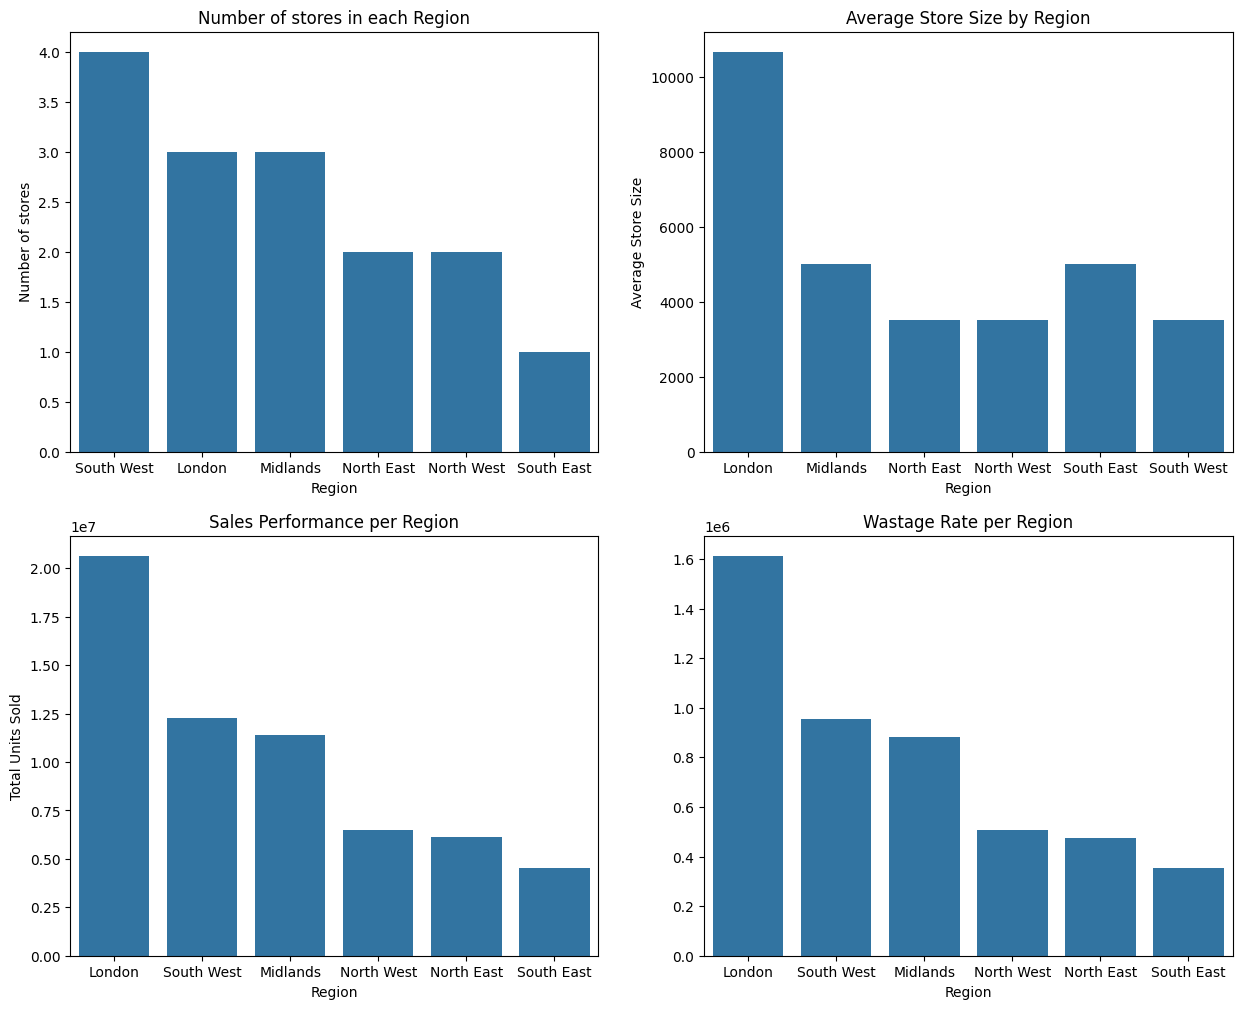

In [ ]:
#from itertools import product
# sales performance per Region

plt.figure(figsize=(15,12))

# total number of stores per region
plt.subplot(2, 2, 1)
region_store_count = store_info['Region'].value_counts()
sns.barplot(x=region_store_count.index, y=region_store_count.values)
plt.title('Number of stores in each Region')
plt.xlabel('Region')
plt.ylabel('Number of stores')


# average store size per region
plt.subplot(2,2,2)
store_size_by_region = store_info.groupby('Region')['Store_Size'].mean()
sns.barplot(x=store_size_by_region.index, y=store_size_by_region.values)
plt.title('Average Store Size by Region')
plt.xlabel('Region')
plt.ylabel('Average Store Size')

# sales performance per region (join store info and weekly sales)
plt.subplot(2,2,3)
store_sales_by_region = weekly_sales.merge(store_info, on='Store_ID')
store_region_performance = store_sales_by_region.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
sns.barplot(x=store_region_performance.index, y=store_region_performance.values)
plt.title('Sales Performance per Region')
plt.xlabel('Region')
plt.ylabel('Total Units Sold')


# Wastage Rate per Region
plt.subplot(2,2,4)
product_wastage_per_region = store_sales_by_region.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
sns.barplot(x=product_wastage_per_region.index, y=product_wastage_per_region.values)
plt.title('Wastage Rate per Region')
plt.xlabel('Region')
plt.ylabel




### Average Price per product accross all categories

### Discount Performance

/tmp/ipython-input-351585491.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_per_product_category.index,


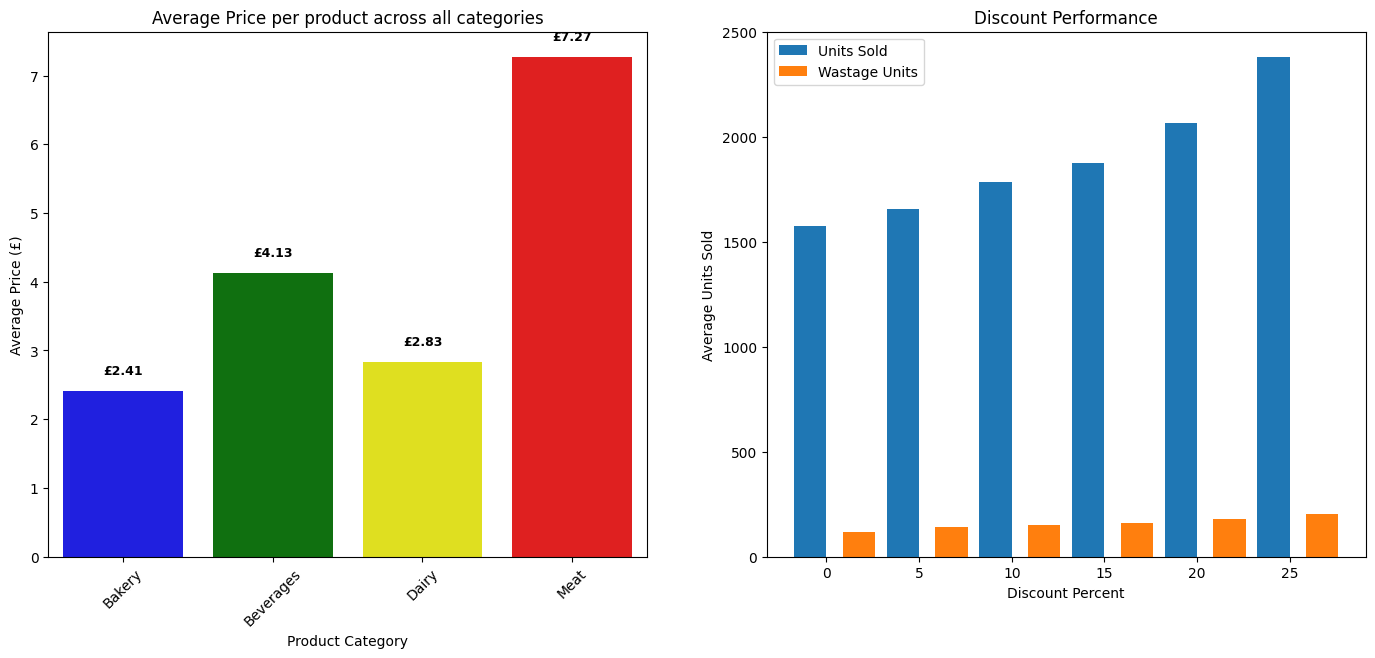

In [ ]:
plt.figure(figsize=(17,15))

plt.subplot(2,2,1)

#Average Price per product accross all categories
category_price= weekly_sales.merge(product_details, on='Product_ID')
price_per_product_category = category_price.groupby('Product_Category')['Price'].mean()
sns.barplot(x=price_per_product_category.index,
            y=price_per_product_category.values,
            palette=['blue','green', 'yellow', 'red'])
plt.title('Average Price per product across all categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)


# Add text labels above bars
for i, (cat, val) in enumerate(zip(price_per_product_category.index, price_per_product_category.values)):
  plt.text(i, val+0.2, f"£{val:.2f}", ha='center', va='bottom', fontweight='bold', fontsize=9)


#discount performance
#we are trying to get how the sales perfrom by each discount percentage

plt.subplot(2,2,2)

discount_performance = weekly_sales.groupby('Discount_Percent').agg({
                            'Units_Sold': 'mean',
                            'Wastage_Units': 'mean'
                            }).reset_index()


x=np.arange(len(discount_performance))
width = 0.35


bars1 = plt.bar(x-width/2, discount_performance['Units_Sold'], width, label= 'Units Sold')
bars2 = plt.bar(x + width, discount_performance['Wastage_Units'], width, label='Wastage Units')

plt.title('Discount Performance')
plt.xlabel('Discount Percent')
plt.ylabel('Average Units Sold')
plt.xticks(x, discount_performance['Discount_Percent'])
plt.legend()


In [ ]:
discount_performance
#weekly_sales['Discount_Percent'].value_counts()

### Sales Performance by  product category

In [ ]:
plt.figure(figsize = (14,11))


# Merge sales with product details
sales_with_categories = weekly_sales.merge(product_details, on='Product_ID')

#calculate metrics by category
category_metrics = sales_with_categories.groupby('Product_Category').agg({
    'Units_Sold': 'sum',
    'Price': 'mean',
    'Wastage_Units': 'sum',
     'Marketing_Spend': 'mean'
}).reset_index()

plt.subplot(2,2,1)
plt.bar(category_metrics['Product_Category'], category_metrics['Units_Sold'], color='lightblue')
plt.title('Total Units Sold by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
#plt.tight_layout()

plt.subplot(2,2,2)
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Units'], color = 'Salmon')
plt.title('Total Wastage Units by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Total Wastage Units')
plt.xticks(rotation=45)
#plt.tight_layout()

plt.subplot(2,2,3)
category_metrics['Wastage Rate'] = (category_metrics['Wastage_Units'] / category_metrics['Units_Sold'])*100
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage Rate'], color = 'Orange')
plt.title('Wastage Rate by Category (%)', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Rate (%)')
plt.xticks(rotation=45)
#plt.tight_layout()

plt.subplot(2,2,4)
plt.bar(category_metrics['Product_Category'], category_metrics['Marketing_Spend'], color = 'LightGreen')
plt.title('Average Marketing Spend by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Average Marketing Spend (£)')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()
#




In [ ]:
weekly_sales.head()

In [ ]:
category_metrics